In [1]:
import mxnet as mx
from mxnet import autograd
from mxnet import gluon
from mxnet import ndarray as nd
import numpy as np
import random

mx.random.seed(1)
random.seed(1)

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

In [3]:
net = gluon.nn.Sequential()
net.add(gluon.nn.Dense(1))
square_loss = gluon.loss.L2Loss()

In [4]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

In [5]:
def train(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    net.collect_params().initialize(mx.init.Normal(sigma=1), force_reinit=True)
    
    trainer = gluon.Trainer(net.collect_params(), "sgd", {"learning_rate": lr})
    data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True)
    total_loss = [np.mean(square_loss(net(X), y).asnumpy())]
    
    for epoch in range(1, epochs + 1):
        if epoch > 2:
            trainer.set_learning_rate(trainer.learning_rate * 0.1)
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(np.mean(square_loss(net(X), y).asnumpy()))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, trainer.learning_rate, epoch, total_loss[-1]))
    
    print('w:', np.reshape(net[0].weight.data().asnumpy(), (1, -1)),
          'b:', net[0].bias.data().asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

Batch size 1, Learning rate 0.200000, Epoch 1, loss 5.0910e-05
Batch size 1, Learning rate 0.200000, Epoch 2, loss 6.4832e-05
Batch size 1, Learning rate 0.020000, Epoch 3, loss 4.9259e-05
w: [[ 2.00118256 -3.4002037 ]] b: 4.19923 



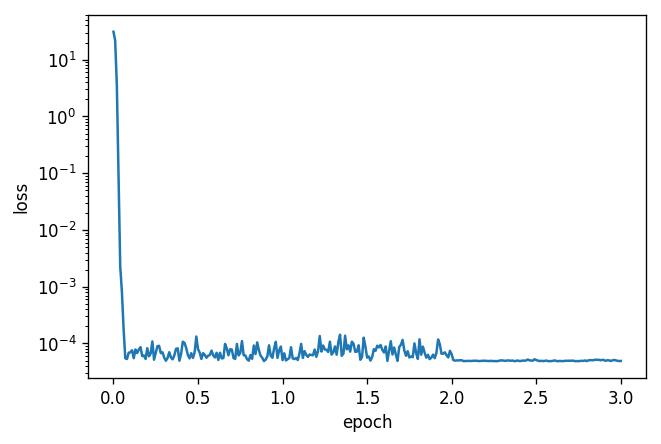

In [6]:
train(batch_size=1, lr=0.2, epochs=3, period=10)

Batch size 1000, Learning rate 0.999000, Epoch 1, loss 7.3842e-02
Batch size 1000, Learning rate 0.999000, Epoch 2, loss 9.8761e-04
Batch size 1000, Learning rate 0.099900, Epoch 3, loss 8.2789e-04
w: [[ 2.01470947 -3.37011194]] b: 4.17426 



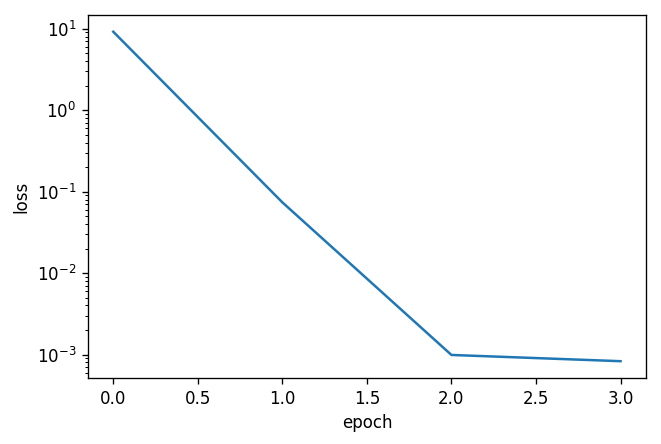

In [7]:
train(batch_size=1000, lr=0.999, epochs=3, period=1000)

Batch size 10, Learning rate 0.200000, Epoch 1, loss 4.9434e-05
Batch size 10, Learning rate 0.200000, Epoch 2, loss 5.1733e-05
Batch size 10, Learning rate 0.020000, Epoch 3, loss 4.8792e-05
w: [[ 2.00055027 -3.40005398]] b: 4.20035 



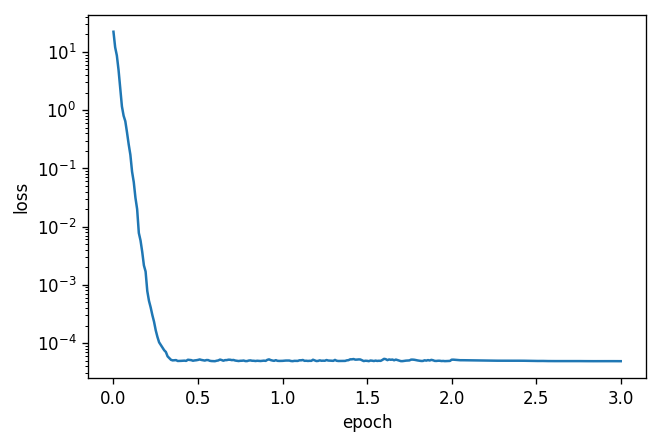

In [8]:
train(batch_size=10, lr=0.2, epochs=3, period=10)

Batch size 10, Learning rate 5.000000, Epoch 1, loss nan
Batch size 10, Learning rate 5.000000, Epoch 2, loss nan
Batch size 10, Learning rate 0.500000, Epoch 3, loss nan
w: [[ nan  nan]] b: nan 



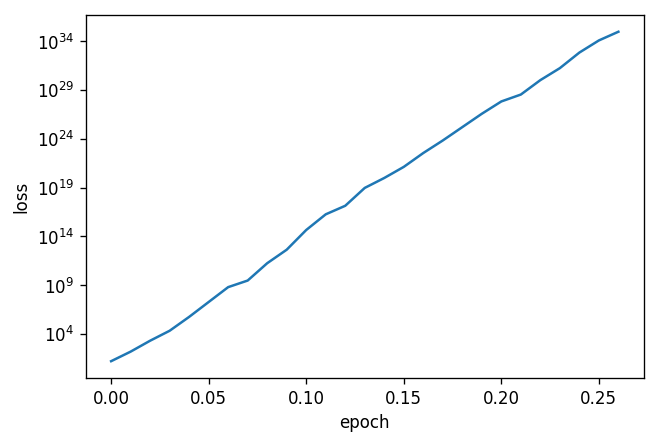

In [9]:
train(batch_size=10, lr=5, epochs=3, period=10)

Batch size 10, Learning rate 0.002000, Epoch 1, loss 1.3283e+01
Batch size 10, Learning rate 0.002000, Epoch 2, loss 8.8150e+00
Batch size 10, Learning rate 0.000200, Epoch 3, loss 8.4618e+00
w: [[ 0.30856001 -0.91306931]] b: 1.43488 



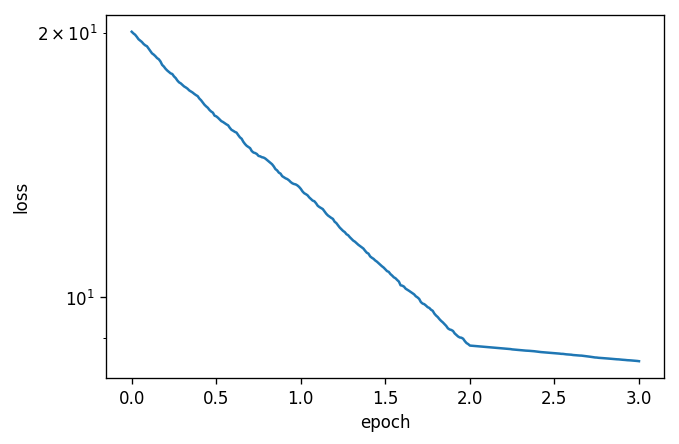

In [10]:
train(batch_size=10, lr=0.002, epochs=3, period=10)